**1.Loading the Dataset**

In [1]:
import pandas as pd
import json

# Loading data from JSON files
with open("users.json", "r") as file:
    users_data = json.load(file)

with open("products.json", "r") as file:
    products_data = json.load(file)

with open("purchases.json", "r") as file:
    purchases_data = json.load(file)


In [2]:
# Converting JSON data to pandas dataframes
users_df = pd.DataFrame(users_data)
products_df = pd.DataFrame(products_data)
purchases_df = pd.DataFrame(purchases_data)

# Loading attributes.csv
attributes_df = pd.read_csv("attributes.csv")

**2. Data exploration:**


Perform some exploratory data analysis (EDA) on the dataframes to understand the dataset better. This might include checking for missing or inconsistent data, analyzing distributions, and visualizing relationships between features.

In [3]:
# Inspecting the dataframes
users_df.head()


,1000001,1000002,1000003,1000004,1000005,1000006,1000007,1000008,1000009,1000010,...,1000640,1000703,1001282,1001674,1004293,1004588,1004871,1004113,1005391,1001529
age,0-17,55+,26-35,46-50,26-35,51-55,36-45,26-35,26-35,36-45,...,18-25,55+,51-55,36-45,46-50,26-35,18-25,36-45,26-35,18-25
bmr,1858,1775,2357,2529,2946,2696,1172,2853,2553,1856,...,1387,2792,2032,1661,1341,2103,1237,2086,1726,1172
city_category,A,C,A,B,A,A,B,C,C,B,...,C,C,C,C,B,C,C,C,A,C
gender,F,M,M,M,M,F,M,M,M,F,...,M,F,M,M,F,F,M,M,M,M
marital_status,0,0,0,1,1,0,1,1,0,1,...,1,1,1,0,1,0,0,0,0,1


In [4]:
products_df.head()

,P00069042,P00248942,P00087842,P00085442,P00285442,P00193542,P00184942,P00346142,P0097242,P00274942,...,P00295642,P00091742,P00350742,P00060842,P00057842,P00375436,P00372445,P00370293,P00371644,P00370853
product_category_1,3,1.0,12,12,8,1,1.0,1,1,8,...,2,13,5,1.0,1.0,20,20,19,20,19
product_category_2,,6.0,,14.0,,2.0,8.0,15.0,16.0,,...,,,14.0,8.0,8.0,,,,,
product_category_3,,14.0,,,,,17.0,,,,...,,,,16.0,16.0,,,,,


In [5]:
purchases_df.head()


,products_purchased ($)
1000001,"{'P00069042': 8370.0, 'P00248942': 15200.0, 'P..."
1000002,"{'P00285442': 7969.0, 'P00112842': 6187.0, 'P0..."
1000003,"{'P00193542': 15227.0, 'P00132842': 12103.0, '..."
1000004,"{'P00184942': 19215.0, 'P00346142': 15854.0, '..."
1000005,"{'P00274942': 7871.0, 'P00251242': 5254.0, 'P0..."


In [6]:
attributes_df.head()

,Attributes,Details
0,user_id,user id (unique per buyer)
1,product_id,product id (unique per product purchased)
2,gender,gender of the user
3,bmi,users basal metabolic rate
4,age,age of the user


In [7]:
# Checking for missing or inconsistent data
print(users_df.isnull().sum().sum())
print(products_df.isnull().sum().sum())
print(purchases_df.isnull().sum().sum())
print(attributes_df.isnull().sum().sum())


0
0
0
0


**3. Data preprocessing:**

Data Preprocessing by handling missing or inconsistent data, merging the dataframes, and encoding categorical variables.

In [8]:
purchase_records = []

for user_id, purchases in purchases_df.iterrows():
    for product_id, purchase_amount in purchases['products_purchased ($)'].items():
        purchase_records.append({
            'user_id': user_id,
            'product_id': product_id,
            'purchase_amount': purchase_amount
        })

purchases_df = pd.DataFrame(purchase_records)


In [9]:
purchases_df

,user_id,product_id,purchase_amount
0,1000001,P00069042,8370.0
1,1000001,P00248942,15200.0
2,1000001,P00087842,1422.0
3,1000001,P00085442,1057.0
4,1000001,P00085942,12842.0
...,...,...,...
550063,1006040,P00184342,9855.0
550064,1006040,P00193142,1962.0
550065,1006040,P00029842,7852.0
550066,1006040,P00106042,7159.0


In [10]:
users_df.reset_index(inplace=True)
users_df.rename(columns={'index': 'user_id'}, inplace=True)

products_df.reset_index(inplace=True)
products_df.rename(columns={'index': 'product_id'}, inplace=True)


In [11]:
users_df

,user_id,1000001,1000002,1000003,1000004,1000005,1000006,1000007,1000008,1000009,...,1000640,1000703,1001282,1001674,1004293,1004588,1004871,1004113,1005391,1001529
0,age,0-17,55+,26-35,46-50,26-35,51-55,36-45,26-35,26-35,...,18-25,55+,51-55,36-45,46-50,26-35,18-25,36-45,26-35,18-25
1,bmr,1858,1775,2357,2529,2946,2696,1172,2853,2553,...,1387,2792,2032,1661,1341,2103,1237,2086,1726,1172
2,city_category,A,C,A,B,A,A,B,C,C,...,C,C,C,C,B,C,C,C,A,C
3,gender,F,M,M,M,M,F,M,M,M,...,M,F,M,M,F,F,M,M,M,M
4,marital_status,0,0,0,1,1,0,1,1,0,...,1,1,1,0,1,0,0,0,0,1
5,occupation,10,16,15,7,20,9,1,12,17,...,4,1,1,2,9,4,12,17,7,4
6,stay_in_current_city_years,2,4+,3,2,1,1,1,4+,0,...,2,2,2,3,0,0,2,3,0,4+


In [12]:
products_df

,product_id,P00069042,P00248942,P00087842,P00085442,P00285442,P00193542,P00184942,P00346142,P0097242,...,P00295642,P00091742,P00350742,P00060842,P00057842,P00375436,P00372445,P00370293,P00371644,P00370853
0,product_category_1,3,1.0,12,12,8,1,1.0,1,1,...,2,13,5,1.0,1.0,20,20,19,20,19
1,product_category_2,,6.0,,14.0,,2.0,8.0,15.0,16.0,...,,,14.0,8.0,8.0,,,,,
2,product_category_3,,14.0,,,,,17.0,,,...,,,,16.0,16.0,,,,,


In [13]:
# Transpose dataframe
transposed_users = users_df.T

# Setting first row as columns
transposed_users = transposed_users.set_axis(transposed_users.iloc[0], axis=1).drop(transposed_users.index[0])

transposed_users = transposed_users.rename_axis('index').reset_index()
transposed_users = transposed_users.rename(columns={'index': 'user_id'})
transposed_users.index.name = "index"

In [14]:
transposed_users

user_id,user_id,age,bmr,city_category,gender,marital_status,occupation,stay_in_current_city_years
index,,,,,,,,
0,1000001,0-17,1858,A,F,0,10,2
1,1000002,55+,1775,C,M,0,16,4+
2,1000003,26-35,2357,A,M,0,15,3
3,1000004,46-50,2529,B,M,1,7,2
4,1000005,26-35,2946,A,M,1,20,1
...,...,...,...,...,...,...,...,...
5886,1004588,26-35,2103,C,F,0,4,0
5887,1004871,18-25,1237,C,M,0,12,2
5888,1004113,36-45,2086,C,M,0,17,3


In [15]:
# Transpose dataframe
transposed_prod = products_df.T

# Setting first row as columns
transposed_prod = transposed_prod.set_axis(transposed_prod.iloc[0], axis=1).drop(transposed_prod.index[0])

transposed_prod = transposed_prod.rename_axis('index').reset_index()
transposed_prod = transposed_prod.rename(columns={'index': 'product_id'})
transposed_prod.index.name = "index"

In [16]:
transposed_prod

product_id,product_id,product_category_1,product_category_2,product_category_3
index,,,,
0,P00069042,3,,
1,P00248942,1.0,6.0,14.0
2,P00087842,12,,
3,P00085442,12,14.0,
4,P00285442,8,,
...,...,...,...,...
3626,P00375436,20,,
3627,P00372445,20,,
3628,P00370293,19,,


In [17]:
#Merging the datframes
merged_df =purchases_df.merge(transposed_users, on='user_id', how='left').merge(transposed_prod, on='product_id', how='left')



In [18]:
merged_df.head()

,user_id,product_id,purchase_amount,age,bmr,city_category,gender,marital_status,occupation,stay_in_current_city_years,product_category_1,product_category_2,product_category_3
0,1000001,P00069042,8370.0,0-17,1858,A,F,0,10,2,3,,
1,1000001,P00248942,15200.0,0-17,1858,A,F,0,10,2,1.0,6.0,14.0
2,1000001,P00087842,1422.0,0-17,1858,A,F,0,10,2,12,,
3,1000001,P00085442,1057.0,0-17,1858,A,F,0,10,2,12,14.0,
4,1000001,P00085942,12842.0,0-17,1858,A,F,0,10,2,2.0,4.0,8.0


In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [20]:
merged_df.head()

,user_id,product_id,purchase_amount,age,bmr,city_category,gender,marital_status,occupation,stay_in_current_city_years,product_category_1,product_category_2,product_category_3
0,1000001,P00069042,8370.0,0-17,1858,A,F,0,10,2,3,,
1,1000001,P00248942,15200.0,0-17,1858,A,F,0,10,2,1.0,6.0,14.0
2,1000001,P00087842,1422.0,0-17,1858,A,F,0,10,2,12,,
3,1000001,P00085442,1057.0,0-17,1858,A,F,0,10,2,12,14.0,
4,1000001,P00085942,12842.0,0-17,1858,A,F,0,10,2,2.0,4.0,8.0


In [21]:
# Checking the shape and first few rows of the merged dataset
print(merged_df.shape)
print(merged_df.head())

(550068, 13)
   user_id product_id  purchase_amount   age   bmr city_category gender  \
0  1000001  P00069042           8370.0  0-17  1858             A      F   
1  1000001  P00248942          15200.0  0-17  1858             A      F   
2  1000001  P00087842           1422.0  0-17  1858             A      F   
3  1000001  P00085442           1057.0  0-17  1858             A      F   
4  1000001  P00085942          12842.0  0-17  1858             A      F   

  marital_status occupation stay_in_current_city_years product_category_1  \
0              0         10                          2                  3   
1              0         10                          2                1.0   
2              0         10                          2                 12   
3              0         10                          2                 12   
4              0         10                          2                2.0   

  product_category_2 product_category_3  
0                              

In [22]:
# Checking the data types of columns
print(merged_df.dtypes)

user_id                        object
product_id                     object
purchase_amount               float64
age                            object
bmr                            object
city_category                  object
gender                         object
marital_status                 object
occupation                     object
stay_in_current_city_years     object
product_category_1             object
product_category_2             object
product_category_3             object
dtype: object


In [23]:
# Checking for missing values
print(merged_df.isnull().sum())

user_id                       0
product_id                    0
purchase_amount               0
age                           0
bmr                           0
city_category                 0
gender                        0
marital_status                0
occupation                    0
stay_in_current_city_years    0
product_category_1            0
product_category_2            0
product_category_3            0
dtype: int64


In [24]:
# Summary statistics
print(merged_df.describe())

       purchase_amount
count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000


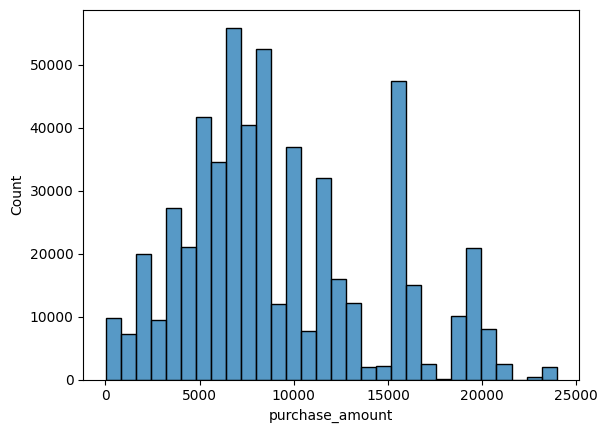

In [25]:
# Distribution of the target variable (purchase_amount)
sns.histplot(merged_df['purchase_amount'], bins=30)
plt.show()


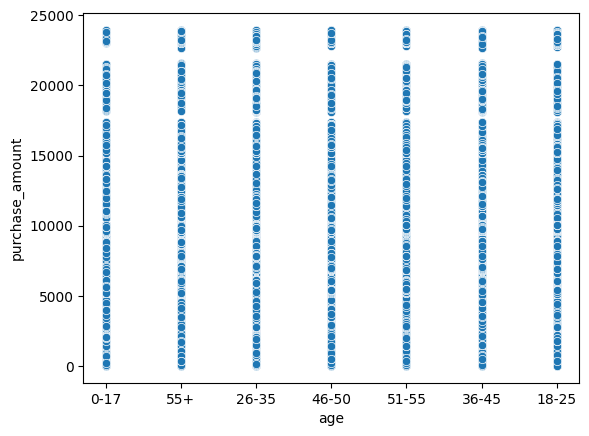

In [26]:
# Scatter plot of purchase amount vs. age
sns.scatterplot(x='age', y='purchase_amount', data=merged_df)
plt.show()

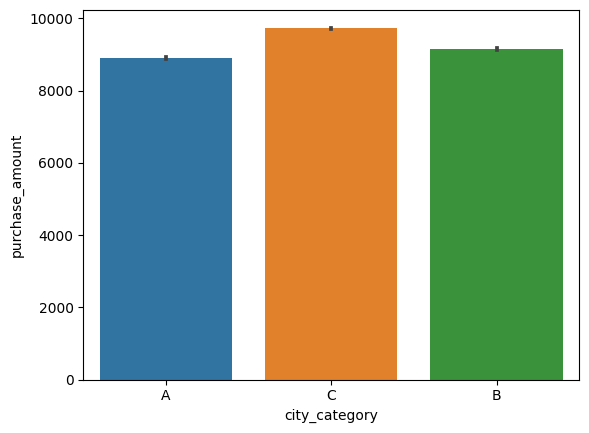

In [27]:
# Bar plot of purchase amount by city category
sns.barplot(x='city_category', y='purchase_amount', data=merged_df)
plt.show()



In [28]:
missing_values = merged_df[['product_category_1', 'product_category_2', 'product_category_3']].isnull().sum()
missing_percentages = missing_values / len(merged_df) * 100
print(missing_percentages)


product_category_1    0.0
product_category_2    0.0
product_category_3    0.0
dtype: float64


**Count of unique users and products**

In [29]:
print("Number of unique users:", merged_df['user_id'].nunique())
print("Number of unique products:", merged_df['product_id'].nunique())

Number of unique users: 5891
Number of unique products: 3631


**Count of purchases by gender**

In [30]:
print("\nNumber of purchases by gender:")
print(merged_df.groupby(['gender'])['purchase_amount'].count())


Number of purchases by gender:
gender
F    135809
M    414259
Name: purchase_amount, dtype: int64


**Average purchase amount by age group**

In [31]:
print("\nAverage purchase amount by age group:")
print(merged_df.groupby(['age'])['purchase_amount'].mean())


Average purchase amount by age group:
age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: purchase_amount, dtype: float64


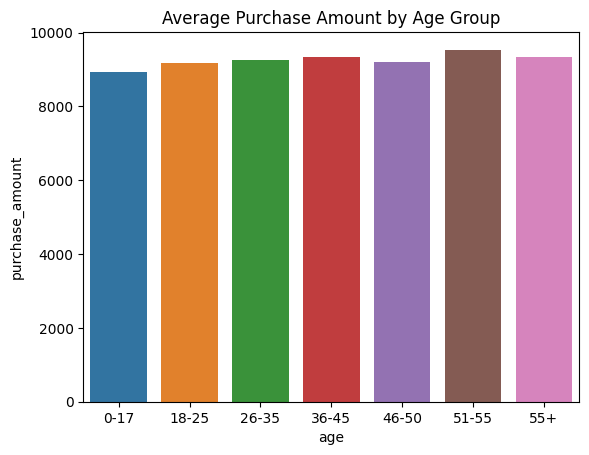

In [32]:
# 1. Average purchase amount by age group
age_purchase = merged_df.groupby('age')['purchase_amount'].mean().reset_index()
sns.barplot(x='age', y='purchase_amount', data=age_purchase)
plt.title('Average Purchase Amount by Age Group')
plt.show()


**Distribution of purchase amount by city category**

In [33]:
print("\nDistribution of purchase amount by city category:")
merged_df.groupby(['city_category'])['purchase_amount'].describe()


Distribution of purchase amount by city category:


,count,mean,std,min,25%,50%,75%,max
city_category,,,,,,,,
A,147720.0,8911.939216,4892.115238,12.0,5403.0,7931.0,11786.0,23961.0
B,231173.0,9151.300563,4955.496566,12.0,5460.0,8005.0,11986.0,23960.0
C,171175.0,9719.920993,5189.465121,12.0,6031.5,8585.0,13197.0,23961.0


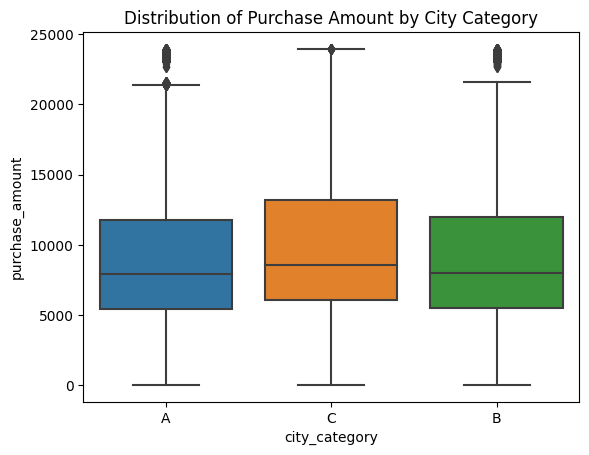

In [34]:
# 2. Distribution of purchase amount by city category
sns.boxplot(x='city_category', y='purchase_amount', data=merged_df)
plt.title('Distribution of Purchase Amount by City Category')
plt.show()

**Count of purchases by occupation**

In [35]:
print("\nNumber of purchases by occupation:")
print(merged_df.groupby(['occupation'])['purchase_amount'].count())


Number of purchases by occupation:
occupation
0     69638
1     47426
2     26588
3     17650
4     72308
5     12177
6     20355
7     59133
8      1546
9      6291
10    12930
11    11586
12    31179
13     7728
14    27309
15    12165
16    25371
17    40043
18     6622
19     8461
20    33562
Name: purchase_amount, dtype: int64


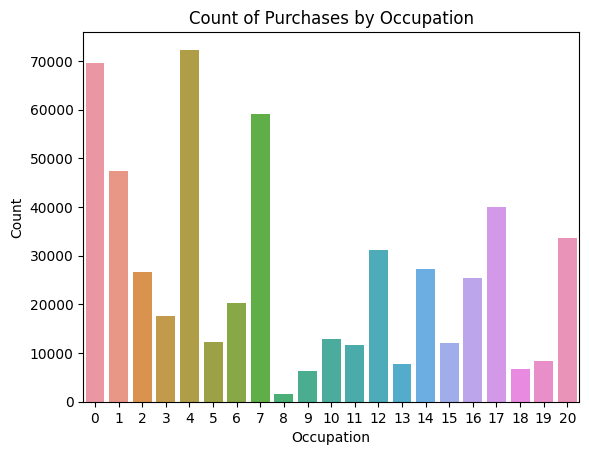

In [36]:
# 3. Count of purchases by occupation
occupation_count = merged_df['occupation'].value_counts().reset_index()
sns.barplot(x='index', y='occupation', data=occupation_count)
plt.title('Count of Purchases by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

**Average purchase amount by product category 1**

In [37]:
print("\nAverage purchase amount by product category 1:")
merged_df.groupby(['product_category_1'])['purchase_amount'].mean()


Average purchase amount by product category 1:


product_category_1
1.0     13606.218596
2.0     11251.935384
3.0     10096.705734
4.0      2329.659491
5.0      6240.088178
6.0     15838.478550
7.0     16365.689600
8.0      7498.958078
9.0     15537.375610
10.0    19675.570927
11.0     4685.268456
12.0     1350.859894
13.0      722.400613
14.0    13141.625739
15.0    14780.451828
16.0    14766.037037
17.0    10170.759516
18.0     2972.864320
19.0       37.041797
20.0      370.481176
Name: purchase_amount, dtype: float64

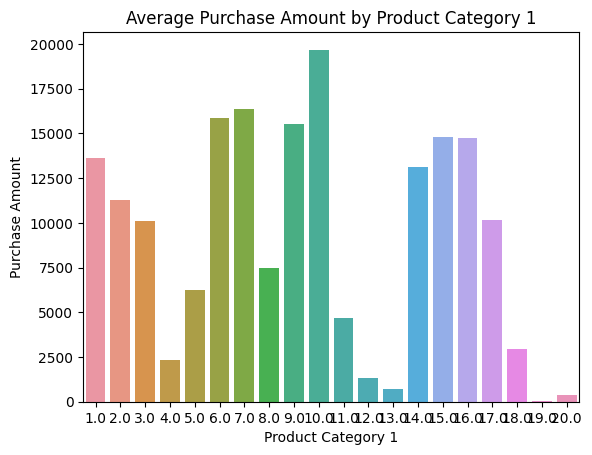

In [38]:
# 4. Average purchase amount by product category 1
cat1_purchase = merged_df.groupby('product_category_1')['purchase_amount'].mean().reset_index()
sns.barplot(x='product_category_1', y='purchase_amount', data=cat1_purchase)
plt.title('Average Purchase Amount by Product Category 1')
plt.xlabel('Product Category 1')
plt.ylabel('Purchase Amount')
plt.show()

**Average purchase amount by product category 2**

In [39]:
print("\nAverage purchase amount by product category 2:")
print(merged_df.groupby(['product_category_2'])['purchase_amount'].mean())


Average purchase amount by product category 2:
product_category_2
2.0     13619.356401
3.0     11235.359570
4.0     10215.192001
5.0      9027.821574
6.0     11503.551379
7.0      6884.683706
8.0     10273.259518
9.0      7277.006851
10.0    15648.729543
11.0     8940.580515
12.0     6975.472504
13.0     9683.352388
14.0     7105.264916
15.0    10357.077691
16.0    10295.681933
17.0     9421.576577
18.0     9352.440433
         7518.695389
Name: purchase_amount, dtype: float64


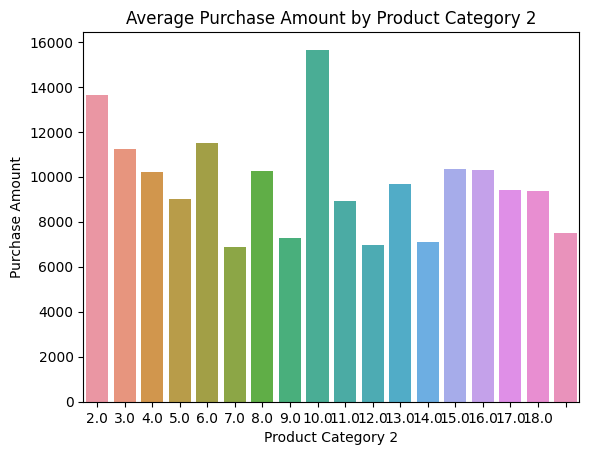

In [40]:
# 5. Average purchase amount by product category 2
cat2_purchase = merged_df.groupby('product_category_2')['purchase_amount'].mean().reset_index()
sns.barplot(x='product_category_2', y='purchase_amount', data=cat2_purchase)
plt.title('Average Purchase Amount by Product Category 2')
plt.xlabel('Product Category 2')
plt.ylabel('Purchase Amount')
plt.show()

**Average purchase amount by product category 3**

In [41]:
print("\nAverage purchase amount by product category 3:")
print(merged_df.groupby(['product_category_3'])['purchase_amount'].mean())


Average purchase amount by product category 3:
product_category_3
3.0     13939.696574
4.0      9794.386667
5.0     12117.786889
6.0     13194.311043
8.0     13024.918882
9.0     10431.697210
10.0    13505.813441
11.0    12091.437673
12.0     8715.512762
13.0    13185.118703
14.0    10052.594530
15.0    12339.369900
16.0    11981.890642
17.0    11769.943001
18.0    10993.980773
         8221.836943
Name: purchase_amount, dtype: float64


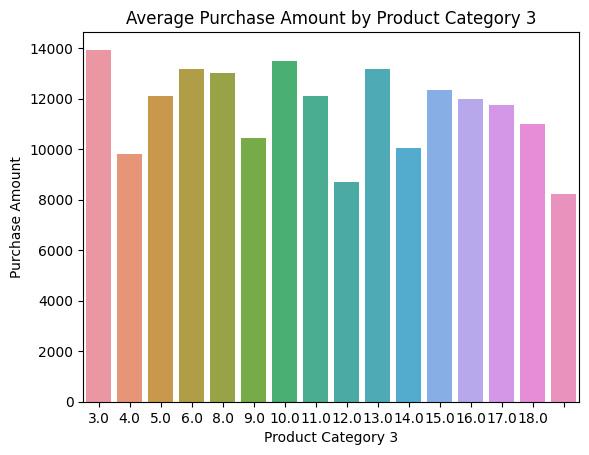

In [42]:
# 6. Average purchase amount by product category 3
cat3_purchase = merged_df.groupby('product_category_3')['purchase_amount'].mean().reset_index()
sns.barplot(x='product_category_3', y='purchase_amount', data=cat3_purchase)
plt.title('Average Purchase Amount by Product Category 3')
plt.xlabel('Product Category 3')
plt.ylabel('Purchase Amount')
plt.show()

**Top 10 products based on purchase amount**

In [43]:
print("\nTop 10 products based on purchase amount:")
print(merged_df.groupby(['product_id'])['purchase_amount'].sum().nlargest(10))


Top 10 products based on purchase amount:
product_id
P00025442    27995166.0
P00110742    26722309.0
P00255842    25168963.0
P00059442    24338343.0
P00184942    24334887.0
P00112142    24216006.0
P00110942    23639564.0
P00237542    23425576.0
P00057642    23102780.0
P00010742    22164153.0
Name: purchase_amount, dtype: float64


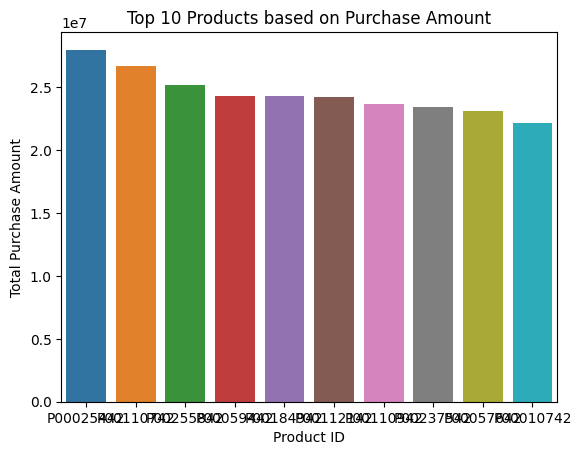

In [44]:
# 7. Top 10 products based on purchase amount
top_products = merged_df.groupby('product_id')['purchase_amount'].sum().reset_index().sort_values('purchase_amount', ascending=False)[:10]
sns.barplot(x='product_id', y='purchase_amount', data=top_products)
plt.title('Top 10 Products based on Purchase Amount')
plt.xlabel('Product ID')
plt.ylabel('Total Purchase Amount')
plt.show()

**Top 10 users based on purchase amount**

In [45]:
print("\nTop 10 users based on purchase amount:")
print(merged_df.groupby(['user_id'])['purchase_amount'].sum().nlargest(10))


Top 10 users based on purchase amount:
user_id
1004277    10536909.0
1001680     8699596.0
1002909     7577756.0
1001941     6817493.0
1000424     6573609.0
1004448     6566245.0
1005831     6512433.0
1001015     6511314.0
1003391     6477160.0
1001181     6387961.0
Name: purchase_amount, dtype: float64


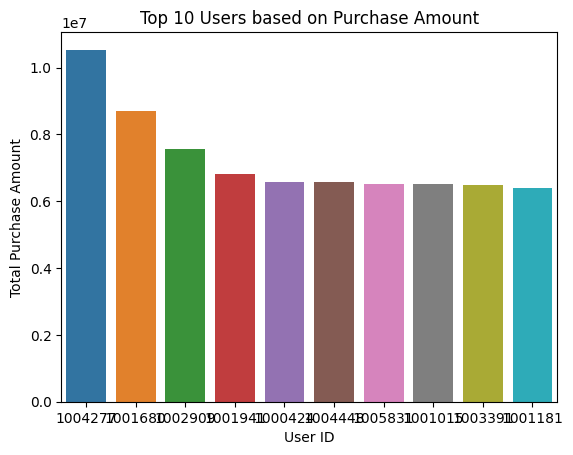

In [46]:
# 8. Top 10 users based on purchase amount
top_users = merged_df.groupby('user_id')['purchase_amount'].sum().reset_index().sort_values('purchase_amount', ascending=False)[:10]
sns.barplot(x='user_id', y='purchase_amount', data=top_users)
plt.title('Top 10 Users based on Purchase Amount')
plt.xlabel('User ID')
plt.ylabel('Total Purchase Amount')
plt.show()

**one-hot encoding**

In [47]:
merged_df

,user_id,product_id,purchase_amount,age,bmr,city_category,gender,marital_status,occupation,stay_in_current_city_years,product_category_1,product_category_2,product_category_3
0,1000001,P00069042,8370.0,0-17,1858,A,F,0,10,2,3,,
1,1000001,P00248942,15200.0,0-17,1858,A,F,0,10,2,1.0,6.0,14.0
2,1000001,P00087842,1422.0,0-17,1858,A,F,0,10,2,12,,
3,1000001,P00085442,1057.0,0-17,1858,A,F,0,10,2,12,14.0,
4,1000001,P00085942,12842.0,0-17,1858,A,F,0,10,2,2.0,4.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006040,P00184342,9855.0,26-35,1836,B,M,0,6,2,8,,
550064,1006040,P00193142,1962.0,26-35,1836,B,M,0,6,2,5,,
550065,1006040,P00029842,7852.0,26-35,1836,B,M,0,6,2,8,,
550066,1006040,P00106042,7159.0,26-35,1836,B,M,0,6,2,5,,


**correlation analysis**

In [48]:
# Correlation analysis
corr_matrix = merged_df.corr()
corr_matrix["purchase_amount"].sort_values(ascending=False)


<ipython-input-48-89b2a0c656c3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = merged_df.corr()


purchase_amount    1.0
Name: purchase_amount, dtype: float64

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting numerical columns for correlation matrix
numerical_cols = ['purchase_amount','bmr', 'stay_in_current_city_years']

# Converting the categorical columns to numerical using one-hot encoding
categorical_cols = ['city_category', 'age','gender', 'marital_status', 'occupation', 'product_category_1', 'product_category_2', 'product_category_3']
one_hot_encoded_df = pd.get_dummies(merged_df[categorical_cols])

# Combining numerical and one-hot encoded categorical columns
merged_df_encoded = pd.concat([merged_df[numerical_cols], one_hot_encoded_df], axis=1)




<ipython-input-49-c1e9bbe69185>:9: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  one_hot_encoded_df = pd.get_dummies(merged_df[categorical_cols])
<ipython-input-49-c1e9bbe69185>:9: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  one_hot_encoded_df = pd.get_dummies(merged_df[categorical_cols])
<ipython-input-49-c1e9bbe69185>:9: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  one_hot_encoded_df = pd.get_dummies(merged_df[categorical_cols])


<ipython-input-50-7c4abfd62bd9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = merged_df_encoded.corr()


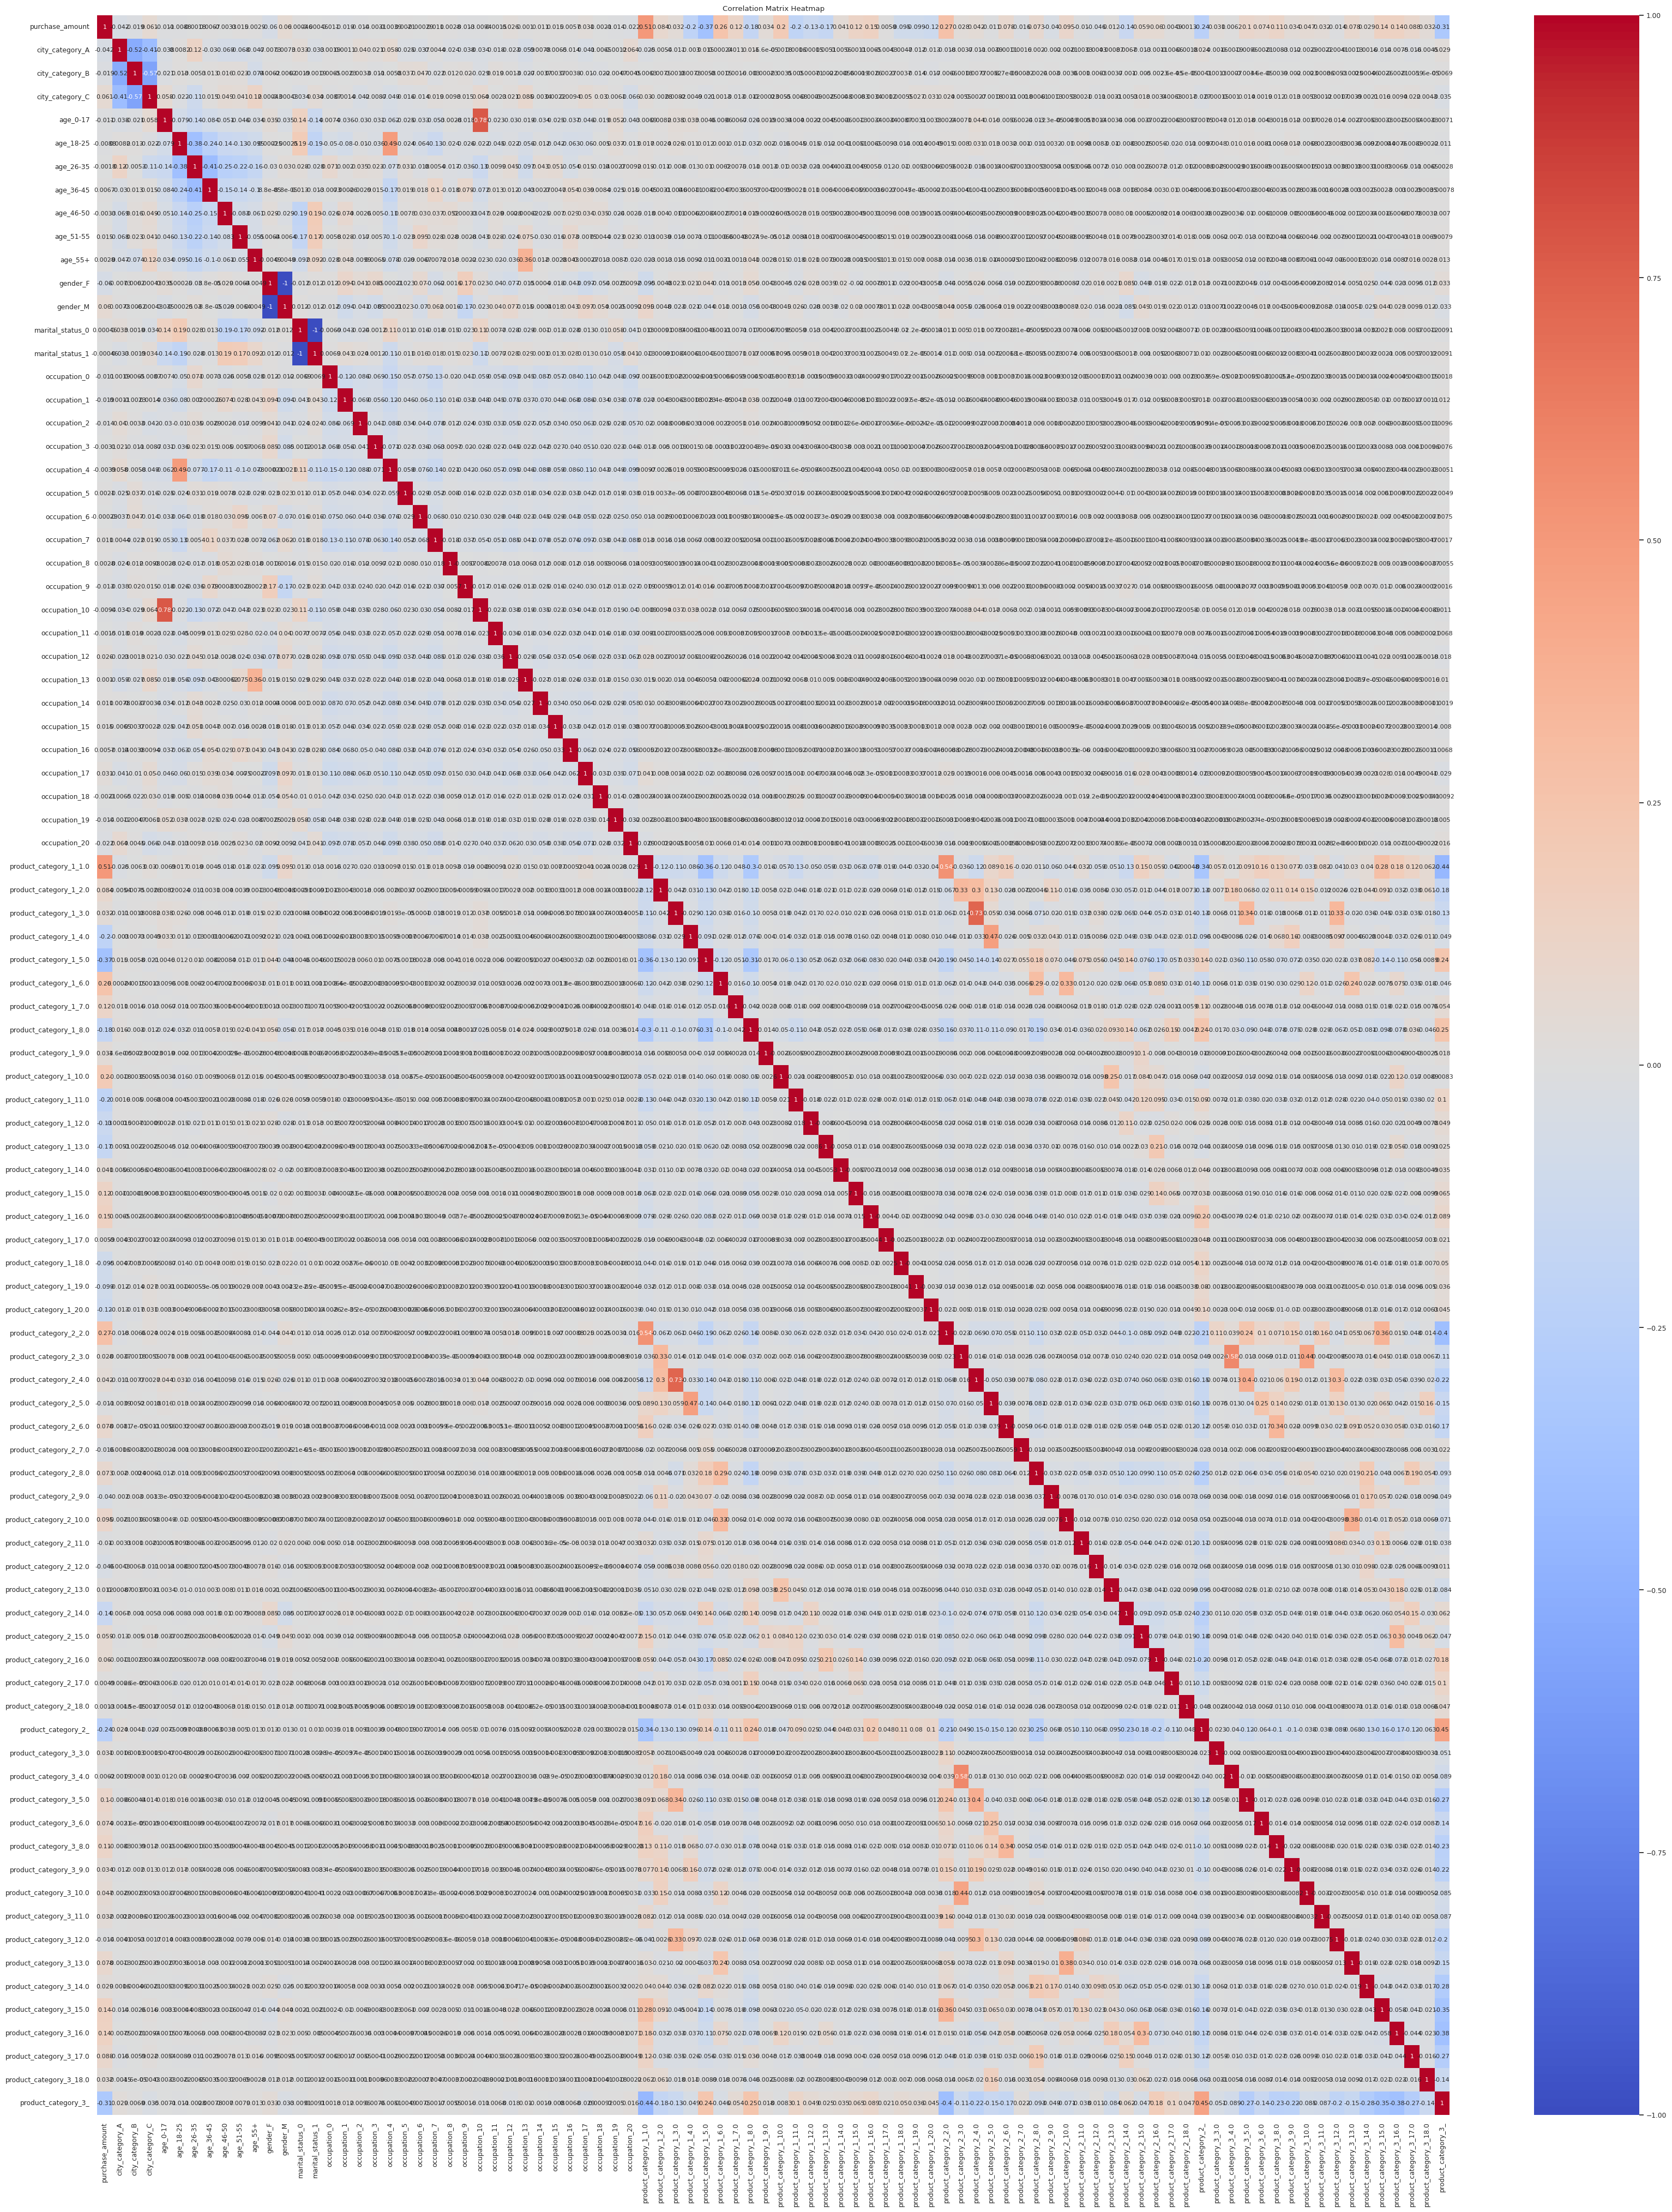

In [50]:
# Calculating correlation matrix
corr_matrix = merged_df_encoded.corr()

# Plotting heatmap for correlation matrix
sns.set(font_scale=0.8)
plt.figure(figsize=(40,50))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, annot_kws={"size": 8})
plt.title('Correlation Matrix Heatmap')

plt.show()

In [51]:
merged_df_encoded

,purchase_amount,bmr,stay_in_current_city_years,city_category_A,city_category_B,city_category_C,age_0-17,age_18-25,age_26-35,age_36-45,...,product_category_3_10.0,product_category_3_11.0,product_category_3_12.0,product_category_3_13.0,product_category_3_14.0,product_category_3_15.0,product_category_3_16.0,product_category_3_17.0,product_category_3_18.0,product_category_3_
0,8370.0,1858,2,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,15200.0,1858,2,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1422.0,1858,2,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1057.0,1858,2,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,12842.0,1858,2,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,9855.0,1836,2,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
550064,1962.0,1836,2,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
550065,7852.0,1836,2,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
550066,7159.0,1836,2,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [52]:
merged_df_encoded['stay_in_current_city_years'] = merged_df_encoded['stay_in_current_city_years'].str.replace('+', '')
merged_df_encoded['stay_in_current_city_years'] = merged_df_encoded['stay_in_current_city_years'].astype(int)


<ipython-input-52-01d685fb2286>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  merged_df_encoded['stay_in_current_city_years'] = merged_df_encoded['stay_in_current_city_years'].str.replace('+', '')


In [53]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Drop non-numeric columns
merged_df_numeric = merged_df_encoded.drop(['purchase_amount'], axis=1)

# Standardizing/Scaling the data
scaler = StandardScaler()
merged_df_standardized = scaler.fit_transform(merged_df_numeric)





In [54]:
# Perform PCA
pca = PCA()
pca.fit(merged_df_standardized)


PCA()

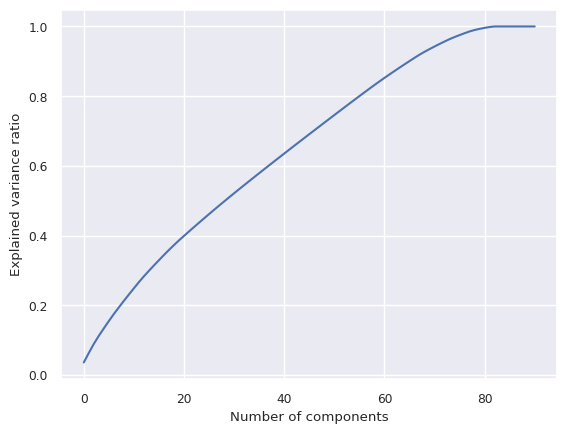

In [56]:
# Plot explained variance ratio
import numpy as np
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Explained variance ratio")
plt.show()

# **Regression Model**

In [57]:
X=merged_df_standardized
y=merged_df_encoded['purchase_amount']

**1. LASSO Regression**

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Make predictions on test set
y_pred = lasso.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

print("Lasso Regression R^2 Score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Lasso Regression Mean Squared Error: {:.2f}".format(mse))


Lasso Regression R^2 Score: 0.65
Lasso Regression Mean Squared Error: 8853529.85


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.855e+09, tolerance: 1.110e+09
  model = cd_fast.enet_coordinate_descent(
